# Visualizations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
def load_object(filename):
    with open(filename, 'rb') as inp:
        return pickle.load(inp)

## Robustness (R2, MAE, MSE) vs Increasing adv. training %

C:\Users\posta\AppData\Local\Temp\ipykernel_22796\1456273187.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['R2', 'MAE', 'MSE'].mean()
C:\Users\posta\AppData\Local\Temp\ipykernel_22796\1456273187.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res2 = res2.groupby(['adv_training_percentage'])['R2', 'MAE', 'MSE'].mean()
C:\Users\posta\AppData\Local\Temp\ipykernel_22796\1456273187.py:55: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


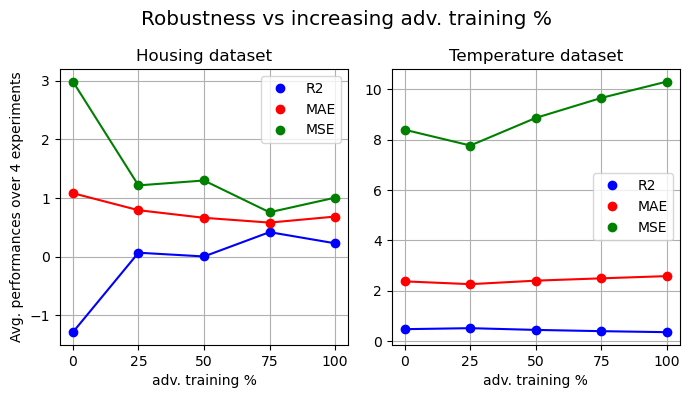

In [4]:
# housing, x=percentage, y1=r2, y2=mae, y3=mse, mediato nei 4 casi attack1-attack2

dataset = "housing"


res1 = load_object("results")
res1 = res1[res1["dataset"]==dataset]
res1 = res1[["adv_training_percentage","R2","MAE","MSE"]]
res1 = res1.groupby(['adv_training_percentage'])['R2', 'MAE', 'MSE'].mean()

dataset = "temperature"
res2 = load_object("results")
res2 = res2[res2["dataset"]==dataset]
res2 = res2[["adv_training_percentage","R2","MAE","MSE"]]
res2 = res2.groupby(['adv_training_percentage'])['R2', 'MAE', 'MSE'].mean()

x = [0,25,50,75,100]
y11 = res1[['R2']].to_numpy()
y12 = res1[['MAE']].to_numpy()
y13 = res1[['MSE']].to_numpy()

y21 = res2[['R2']].to_numpy()
y22 = res2[['MAE']].to_numpy()
y23 = res2[['MSE']].to_numpy()


fig, ax = plt.subplots(1,2,figsize=(7, 4), layout='constrained')
ax[0].plot(x, y11, 'bo', label='R2')
ax[0].plot(x, y11, 'b')
ax[0].plot(x, y12, 'ro', label='MAE')
ax[0].plot(x, y12, 'r')
ax[0].plot(x, y13, 'go', label='MSE')
ax[0].plot(x, y13, 'g')
ax[0].set_xlabel("adv. training %")
ax[0].set_ylabel("Avg. performances over 4 experiments")
ax[0].set_title("Housing dataset")
ax[0].legend()
ax[0].grid()
ax[0].set(xticks=x)

ax[1].plot(x, y21, 'bo', label='R2')
ax[1].plot(x, y21, 'b')
ax[1].plot(x, y22, 'ro', label='MAE')
ax[1].plot(x, y22, 'r')
ax[1].plot(x, y23, 'go', label='MSE')
ax[1].plot(x, y23, 'g')
ax[1].set_xlabel("adv. training %")
# ax[1].set_ylabel("Avg.pPerformances over 4 experiments")
ax[1].set_title("Temperature dataset")
ax[1].legend()
ax[1].grid()
ax[1].set(xticks=x)

fig.suptitle("Robustness vs increasing adv. training %", fontsize='x-large')
fig.tight_layout(pad=1)
fig.savefig("fig1.png")

## Effect of adv. training with attack A on test attack B (Housing dataset)

C:\Users\posta\AppData\Local\Temp\ipykernel_22796\2470414987.py:94: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


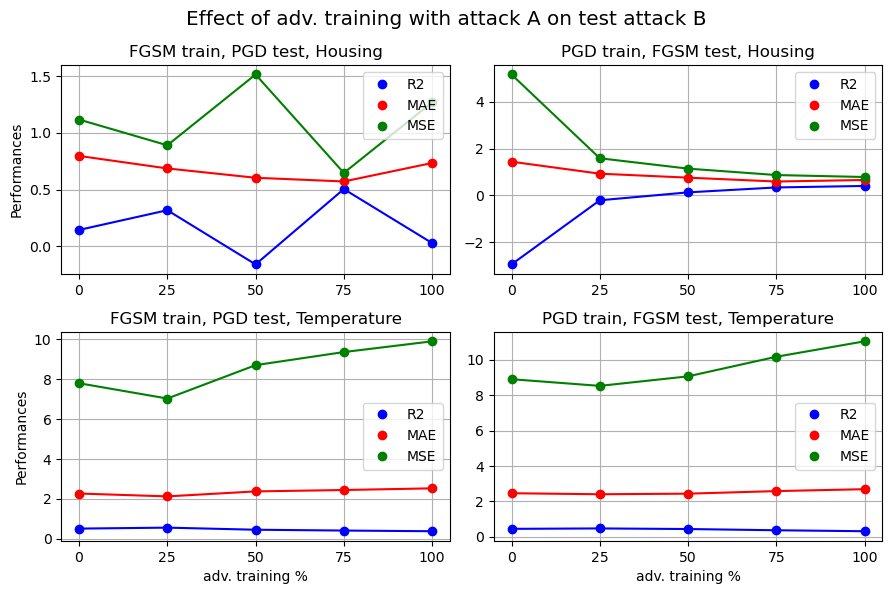

In [24]:
res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[res1["test_attack"]=="pgd"]

res2 = load_object("results")
res2 = res2[res2["dataset"]=="housing"]
res2 = res2[res2["training_attack"]=="pgd"]
res2 = res2[res2["test_attack"]=="fgsm"]

x = [0,25,50,75,100]

y11 = res1[['R2']].to_numpy()
y12 = res1[['MAE']].to_numpy()
y13 = res1[['MSE']].to_numpy()

y21 = res2[['R2']].to_numpy()
y22 = res2[['MAE']].to_numpy()
y23 = res2[['MSE']].to_numpy()

fig, ax = plt.subplots(2,2,figsize=(9, 6), layout='constrained')

ax[0,0].plot(x, y11, 'bo', label='R2')
ax[0,0].plot(x, y11, 'b')
ax[0,0].plot(x, y12, 'ro', label='MAE')
ax[0,0].plot(x, y12, 'r')
ax[0,0].plot(x, y13, 'go', label='MSE')
ax[0,0].plot(x, y13, 'g')
# ax[0,0].set_xlabel("adv. training %")
ax[0,0].set_ylabel("Performances")
ax[0,0].set_title("FGSM train, PGD test, Housing")
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set(xticks=x)

ax[0,1].plot(x, y21, 'bo', label='R2')
ax[0,1].plot(x, y21, 'b')
ax[0,1].plot(x, y22, 'ro', label='MAE')
ax[0,1].plot(x, y22, 'r')
ax[0,1].plot(x, y23, 'go', label='MSE')
ax[0,1].plot(x, y23, 'g')
# ax[0,1].set_xlabel("adv. training %")
ax[0,1].set_title("PGD train, FGSM test, Housing")
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set(xticks=x)

res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[res1["test_attack"]=="pgd"]

res2 = load_object("results")
res2 = res2[res2["dataset"]=="temperature"]
res2 = res2[res2["training_attack"]=="pgd"]
res2 = res2[res2["test_attack"]=="fgsm"]

x = [0,25,50,75,100]

y11 = res1[['R2']].to_numpy()
y12 = res1[['MAE']].to_numpy()
y13 = res1[['MSE']].to_numpy()

y21 = res2[['R2']].to_numpy()
y22 = res2[['MAE']].to_numpy()
y23 = res2[['MSE']].to_numpy()

ax[1,0].plot(x, y11, 'bo', label='R2')
ax[1,0].plot(x, y11, 'b')
ax[1,0].plot(x, y12, 'ro', label='MAE')
ax[1,0].plot(x, y12, 'r')
ax[1,0].plot(x, y13, 'go', label='MSE')
ax[1,0].plot(x, y13, 'g')
ax[1,0].set_xlabel("adv. training %")
ax[1,0].set_ylabel("Performances")
ax[1,0].set_title("FGSM train, PGD test, Temperature")
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set(xticks=x)

ax[1,1].plot(x, y21, 'bo', label='R2')
ax[1,1].plot(x, y21, 'b')
ax[1,1].plot(x, y22, 'ro', label='MAE')
ax[1,1].plot(x, y22, 'r')
ax[1,1].plot(x, y23, 'go', label='MSE')
ax[1,1].plot(x, y23, 'g')
ax[1,1].set_xlabel("adv. training %")
ax[1,1].set_title("PGD train, FGSM test, Temperature")
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set(xticks=x)

fig.suptitle("Effect of adv. training with attack A on test attack B", fontsize='x-large')
fig.tight_layout(pad=1)
fig.savefig("fig2.png")

## Effect of adv. training with attack A on test attack B (Temperature dataset)

C:\Users\posta\AppData\Local\Temp\ipykernel_22796\3350139011.py:53: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


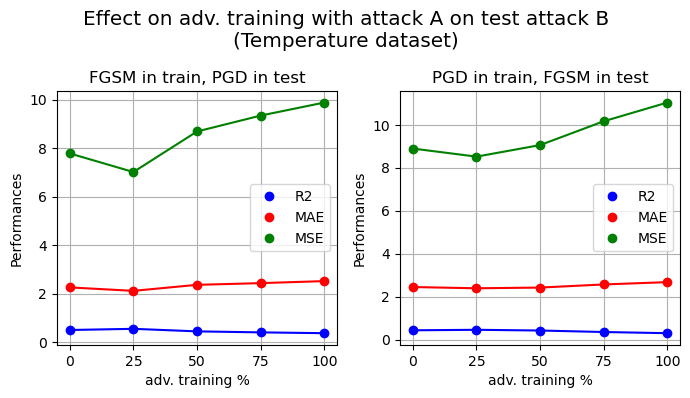

In [6]:
res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[res1["test_attack"]=="pgd"]

res2 = load_object("results")
res2 = res2[res2["dataset"]==dataset]
res2 = res2[res2["training_attack"]=="pgd"]
res2 = res2[res2["test_attack"]=="fgsm"]

x = [0,25,50,75,100]

y11 = res1[['R2']].to_numpy()
y12 = res1[['MAE']].to_numpy()
y13 = res1[['MSE']].to_numpy()

y21 = res2[['R2']].to_numpy()
y22 = res2[['MAE']].to_numpy()
y23 = res2[['MSE']].to_numpy()

fig, ax = plt.subplots(1,2,figsize=(7, 4), layout='constrained')

ax[0].plot(x, y11, 'bo', label='R2')
ax[0].plot(x, y11, 'b')
ax[0].plot(x, y12, 'ro', label='MAE')
ax[0].plot(x, y12, 'r')
ax[0].plot(x, y13, 'go', label='MSE')
ax[0].plot(x, y13, 'g')
ax[0].set_xlabel("adv. training %")
ax[0].set_ylabel("Performances")
ax[0].set_title("FGSM in train, PGD in test")
ax[0].legend()
ax[0].grid()
ax[0].set(xticks=x)

ax[1].plot(x, y21, 'bo', label='R2')
ax[1].plot(x, y21, 'b')
ax[1].plot(x, y22, 'ro', label='MAE')
ax[1].plot(x, y22, 'r')
ax[1].plot(x, y23, 'go', label='MSE')
ax[1].plot(x, y23, 'g')
ax[1].set_xlabel("adv. training %")
ax[1].set_ylabel("Performances")
ax[1].set_title("PGD in train, FGSM in test")
ax[1].legend()
ax[1].grid()
ax[1].set(xticks=x)

fig.suptitle("Effect on adv. training with attack A on test attack B\n(Temperature dataset)", fontsize='x-large')
fig.tight_layout(pad=1)
fig.savefig("fig3.png")

## Price-quality ratio vs increasing adv. training %

C:\Users\posta\AppData\Local\Temp\ipykernel_22796\427635807.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()
C:\Users\posta\AppData\Local\Temp\ipykernel_22796\427635807.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res2 = res2.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()
C:\Users\posta\AppData\Local\Temp\ipykernel_22796\427635807.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res3 = res3.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()
C:\Users\posta\AppData\Local\Temp\ipykernel_22796\427635807.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of 

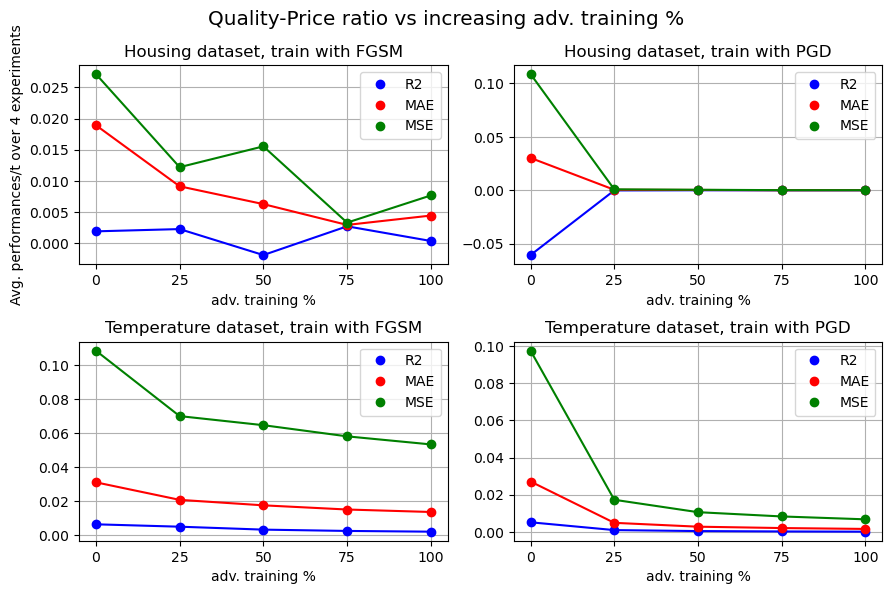

In [7]:
# housing, x=percentage, y1=r2/t, y2=mae/t, y3=mse/t, mediato nei 4 casi attack1-attack2

res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[["adv_training_percentage","R2/time","MAE/time","MSE/time"]]
res1 = res1.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()

res2 = load_object("results")
res2 = res2[res2["dataset"]=="housing"]
res2 = res2[res2["training_attack"]=="pgd"]
res2 = res2[["adv_training_percentage","R2/time","MAE/time","MSE/time"]]
res2 = res2.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()

res3 = load_object("results")
res3 = res3[res3["dataset"]=="temperature"]
res3 = res3[res3["training_attack"]=="fgsm"]
res3 = res3[["adv_training_percentage","R2/time","MAE/time","MSE/time"]]
res3 = res3.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()

res4 = load_object("results")
res4 = res4[res4["dataset"]=="temperature"]
res4 = res4[res4["training_attack"]=="pgd"]
res4 = res4[["adv_training_percentage","R2/time","MAE/time","MSE/time"]]
res4 = res4.groupby(['adv_training_percentage'])['R2/time', 'MAE/time', 'MSE/time'].mean()

x = [0,25,50,75,100]
y11 = res1[['R2/time']].to_numpy()
y12 = res1[['MAE/time']].to_numpy()
y13 = res1[['MSE/time']].to_numpy()

y21 = res2[['R2/time']].to_numpy()
y22 = res2[['MAE/time']].to_numpy()
y23 = res2[['MSE/time']].to_numpy()

y31 = res3[['R2/time']].to_numpy()
y32 = res3[['MAE/time']].to_numpy()
y33 = res3[['MSE/time']].to_numpy()

y41 = res4[['R2/time']].to_numpy()
y42 = res4[['MAE/time']].to_numpy()
y43 = res4[['MSE/time']].to_numpy()

fig, ax = plt.subplots(2,2,figsize=(9, 6), layout='constrained')
ax[0,0].plot(x, y11, 'bo', label='R2')
ax[0,0].plot(x, y11, 'b')
ax[0,0].plot(x, y12, 'ro', label='MAE')
ax[0,0].plot(x, y12, 'r')
ax[0,0].plot(x, y13, 'go', label='MSE')
ax[0,0].plot(x, y13, 'g')
ax[0,0].set_xlabel("adv. training %")
ax[0,0].set_ylabel("Avg. performances/t over 4 experiments")
ax[0,0].set_title("Housing dataset, train with FGSM")
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set(xticks=x)

ax[0,1].plot(x, y21, 'bo', label='R2')
ax[0,1].plot(x, y21, 'b')
ax[0,1].plot(x, y22, 'ro', label='MAE')
ax[0,1].plot(x, y22, 'r')
ax[0,1].plot(x, y23, 'go', label='MSE')
ax[0,1].plot(x, y23, 'g')
ax[0,1].set_xlabel("adv. training %")
ax[0,1].set_title("Housing dataset, train with PGD")
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set(xticks=x)

ax[1,0].plot(x, y31, 'bo', label='R2')
ax[1,0].plot(x, y31, 'b')
ax[1,0].plot(x, y32, 'ro', label='MAE')
ax[1,0].plot(x, y32, 'r')
ax[1,0].plot(x, y33, 'go', label='MSE')
ax[1,0].plot(x, y33, 'g')
ax[1,0].set_xlabel("adv. training %")
ax[1,0].set_title("Temperature dataset, train with FGSM")
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set(xticks=x)

ax[1,1].plot(x, y41, 'bo', label='R2')
ax[1,1].plot(x, y41, 'b')
ax[1,1].plot(x, y42, 'ro', label='MAE')
ax[1,1].plot(x, y42, 'r')
ax[1,1].plot(x, y43, 'go', label='MSE')
ax[1,1].plot(x, y43, 'g')
ax[1,1].set_xlabel("adv. training %")
ax[1,1].set_title("Temperature dataset, train with PGD")
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set(xticks=x)

fig.suptitle("Quality-Price ratio vs increasing adv. training %", fontsize='x-large')
fig.tight_layout(pad=1)
fig.savefig("fig4.png")

## MAE trend compared to Training Time trend

In [8]:
# housing fgsm
res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[["adv_training_percentage","training_time","R2","MAE","MSE"]]
res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()
res1 = res1.reset_index()

x_tmp = res1.loc[[0]]
x1 = []
x2 = []
x3 = []
t = []
for i, x in res1.iterrows():
    t_tmp = (res1["training_time"][i])/(x_tmp["training_time"])
    x1_tmp = (res1["R2"][i])/(x_tmp["R2"])
    x2_tmp = (res1["MAE"][i])/(x_tmp["MAE"])
    x3_tmp = (res1["MSE"][i])/(x_tmp["MSE"])

    t.append(t_tmp.values[0])
    x1.append(x1_tmp.values[0])
    x2.append(x2_tmp.values[0])
    x3.append(x3_tmp.values[0])

    x_tmp = res1.loc[[i]]

print("Housing - train with fgsm")
print(f"Time:\t{t}")
print(f"R2:\t\t{x1}")
print(f"MAE:\t{x2}")
print(f"MSE:\t{x3}")

Housing - train with fgsm
Time:	[1.0, 1.9497767386187697, 1.1605244438426316, 1.8978638239629844, 0.8432191568572823]
R2:		[1.0, 2.316123136418506, -0.9447436631749926, -2.781689250308917, 0.11952392038200237]
MAE:	[1.0, 0.9419263094472494, 0.7986547871283783, 0.8925590492912989, 1.2704349536462545]
MSE:	[1.0, 0.8775654844644653, 1.4774762997705007, 0.40629766343986057, 1.9463782884419143]


C:\Users\posta\AppData\Local\Temp\ipykernel_22796\2762267024.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()


In [9]:
# housing pgd
res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["training_attack"]=="pgd"]
res1 = res1[["adv_training_percentage","training_time","R2","MAE","MSE"]]
res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()
res1 = res1.reset_index()

x_tmp = res1.loc[[0]]
x1 = []
x2 = []
x3 = []
t = []
for i, x in res1.iterrows():
    t_tmp = (res1["training_time"][i])/(x_tmp["training_time"])
    x1_tmp = (res1["R2"][i])/(x_tmp["R2"])
    x2_tmp = (res1["MAE"][i])/(x_tmp["MAE"])
    x3_tmp = (res1["MSE"][i])/(x_tmp["MSE"])

    t.append(t_tmp.values[0])
    x1.append(x1_tmp.values[0])
    x2.append(x2_tmp.values[0])
    x3.append(x3_tmp.values[0])

    x_tmp = res1.loc[[i]]

print("Housing - train with pgd")
print(f"Time:\t{t}")
print(f"R2:\t\t{x1}")
print(f"MAE:\t{x2}")
print(f"MSE:\t{x3}")

Housing - train with pgd
Time:	[1.0, 32.87707220421075, 1.2665971656719561, 2.4240221286731565, 0.9825255064747755]
R2:		[1.0, 0.022590007473002206, -3.2581629919104436, 1.6413343753755463, 1.2328728678045409]
MAE:	[1.0, 0.6011809918139656, 0.8737225889985115, 0.8625096467082621, 1.0902149045333462]
MSE:	[1.0, 0.28969713432163124, 0.7586978182488833, 0.8439271153669153, 0.8897816374966591]


C:\Users\posta\AppData\Local\Temp\ipykernel_22796\818346739.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()


In [10]:
# temperature fgsm
res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["training_attack"]=="fgsm"]
res1 = res1[["adv_training_percentage","training_time","R2","MAE","MSE"]]
res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()
res1 = res1.reset_index()

x_tmp = res1.loc[[0]]
x1 = []
x2 = []
x3 = []
t = []
for i, x in res1.iterrows():
    t_tmp = (res1["training_time"][i])/(x_tmp["training_time"])
    x1_tmp = (res1["R2"][i])/(x_tmp["R2"])
    x2_tmp = (res1["MAE"][i])/(x_tmp["MAE"])
    x3_tmp = (res1["MSE"][i])/(x_tmp["MSE"])

    t.append(t_tmp.values[0])
    x1.append(x1_tmp.values[0])
    x2.append(x2_tmp.values[0])
    x3.append(x3_tmp.values[0])

    x_tmp = res1.loc[[i]]

print("temperature - train with fgsm")
print(f"Time:\t{t}")
print(f"R2:\t\t{x1}")
print(f"MAE:\t{x2}")
print(f"MSE:\t{x3}")

temperature - train with fgsm
Time:	[1.0, 1.4064766262757993, 1.2811838581344828, 1.1921594100958182, 1.1347367254694953]
R2:		[1.0, 1.098259420176192, 0.8386474161587207, 0.9117433176125301, 0.938367010170888]
MAE:	[1.0, 0.939914924566682, 1.082676732896941, 1.025136586354456, 1.02560582584534]
MSE:	[1.0, 0.9076268116120753, 1.1835462258081275, 1.07113960555226, 1.0422866307652154]


C:\Users\posta\AppData\Local\Temp\ipykernel_22796\2249860756.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()


In [11]:
# temperature pgd
res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["training_attack"]=="pgd"]
res1 = res1[["adv_training_percentage","training_time","R2","MAE","MSE"]]
res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()
res1 = res1.reset_index()

x_tmp = res1.loc[[0]]
x1 = []
x2 = []
x3 = []
t = []
for i, x in res1.iterrows():
    t_tmp = (res1["training_time"][i])/(x_tmp["training_time"])
    x1_tmp = (res1["R2"][i])/(x_tmp["R2"])
    x2_tmp = (res1["MAE"][i])/(x_tmp["MAE"])
    x3_tmp = (res1["MSE"][i])/(x_tmp["MSE"])

    t.append(t_tmp.values[0])
    x1.append(x1_tmp.values[0])
    x2.append(x2_tmp.values[0])
    x3.append(x3_tmp.values[0])

    x_tmp = res1.loc[[i]]

print("temperature - train with pgd")
print(f"Time:\t{t}")
print(f"R2:\t\t{x1}")
print(f"MAE:\t{x2}")
print(f"MSE:\t{x3}")

temperature - train with pgd
Time:	[1.0, 5.296778899697363, 1.7908489703126038, 1.4104962764045017, 1.3379835750616997]
R2:		[1.0, 1.0668673454637596, 0.8945829855385073, 0.8633465982122731, 0.8515937652097268]
MAE:	[1.0, 0.9665000298969734, 1.0419456226220558, 1.0512929142004699, 1.0451080686175345]
MSE:	[1.0, 0.9426212506212444, 1.102381291138212, 1.1077008532791046, 1.0911619807861024]


C:\Users\posta\AppData\Local\Temp\ipykernel_22796\2103334295.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['adv_training_percentage'])['training_time', 'R2', 'MAE', 'MSE'].mean()


In [12]:
res1 = load_object("results")
res1 = res1[["dataset","adv_training_percentage","training_attack","training_time","R2","MAE","MSE"]]
res1 = res1.groupby(['dataset','adv_training_percentage','training_attack','training_time'])['R2', 'MAE', 'MSE'].mean()
res1 = res1.sort_values(by=['dataset','training_attack'])
# res1.columns
# res1 = res1['R2', 'MAE', 'MSE']
res1

C:\Users\posta\AppData\Local\Temp\ipykernel_22796\2435361803.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res1 = res1.groupby(['dataset','adv_training_percentage','training_attack','training_time'])['R2', 'MAE', 'MSE'].mean()


R2  \
dataset     adv_training_percentage training_attack training_time             
housing     0                       fgsm            44.030864      0.085109   
            25                      fgsm            85.850353      0.197123   
            50                      fgsm            99.631434     -0.186231   
            75                      fgsm            189.086894     0.518037   
            100                     fgsm            159.441691     0.061918   
            0                       pgd             43.964837     -2.659243   
            25                      pgd             1445.435115   -0.060072   
            50                      pgd             1830.784020    0.195725   
            75                      pgd             4437.860977    0.321251   
            100                     pgd             4360.311604    0.396062   
temperature 0                       fgsm            75.803202      0.484561   
            25                      fgsm            106.615432     0.532174   
            50                      fgsm            136.593971     0.446306   
            75                      fgsm            162.841787     0.406917   
            100                     fgsm            184.782557     0.381837   
            0                       pgd             88.008097      0.461815   
            25                      pgd             466.159433     0.492696   
            50                      pgd             834.821141     0.440757   
            75                      pgd             1177.512111    0.380526   
            100                     pgd             1575.491864    0.324054   

                                                                        MAE  \
dataset     adv_training_percentage training_attack training_time             
housing     0                       fgsm            44.030864      0.834359   
            25                      fgsm            85.850353      0.785905   
            50                      fgsm            99.631434      0.627667   
            75                      fgsm            189.086894     0.560230   
            100                     fgsm            159.441691     0.711735   
            0                       pgd             43.964837      1.333567   
            25                      pgd             1445.435115    0.801715   
            50                      pgd             1830.784020    0.700477   
            75                      pgd             4437.860977    0.604168   
            100                     pgd             4360.311604    0.658673   
temperature 0                       fgsm            75.803202      2.354300   
            25                      fgsm            106.615432     2.212841   
            50                      fgsm            136.593971     2.395792   
            75                      fgsm            162.841787     2.456014   
            100                     fgsm            184.782557     2.518902   
            0                       pgd             88.008097      2.390408   
            25                      pgd             466.159433     2.310330   
            50                      pgd             834.821141     2.407238   
            75                      pgd             1177.512111    2.530712   
            100                     pgd             1575.491864    2.644868   

                                                                         MSE  
dataset     adv_training_percentage training_attack training_time             
housing     0                       fgsm            44.030864       1.195515  
            25                      fgsm            85.850353       1.049142  
            50                      fgsm            99.631434       1.550083  
            75                      fgsm            189.086894      0.629795  
            100                     fgsm            159.441691      1.225819  
            0                       pgd   

## FGSM vs PGD

In [13]:
# plain model attacked with FGSM and plain model attacked with PGD

dataset = "housing"

res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["test_attack"]=="fgsm"]
res1 = res1[res1["adv_training_percentage"]==0]
res1 = res1[["training_time","R2","MAE","MSE"]]
print("Plain housing models attacked with fgsm:")
print(res1)
print()

res1 = load_object("results")
res1 = res1[res1["dataset"]=="housing"]
res1 = res1[res1["test_attack"]=="pgd"]
res1 = res1[res1["adv_training_percentage"]==0]
res1 = res1[["training_time","R2","MAE","MSE"]]
print("Plain housing models attacked with pgd:")
print(res1)
print()

res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["test_attack"]=="fgsm"]
res1 = res1[res1["adv_training_percentage"]==0]
res1 = res1[["training_time","R2","MAE","MSE"]]
print("Plain temperature models attacked with fgsm:")
print(res1)
print()

res1 = load_object("results")
res1 = res1[res1["dataset"]=="temperature"]
res1 = res1[res1["test_attack"]=="pgd"]
res1 = res1[res1["adv_training_percentage"]==0]
res1 = res1[["training_time","R2","MAE","MSE"]]
print("Plain temperature models attacked with pgd:")
print(res1)
# res1 = res1[["test_attack","training_time","R2","MAE","MSE"]]
# res1 = res1.groupby(['adv_training_percentage'])['training_time','R2', 'MAE', 'MSE'].mean()

Plain housing models attacked with fgsm:
    training_time        R2       MAE       MSE
0       44.030864  0.024905  0.872241  1.274186
10      43.964837 -2.952391  1.437504  5.164704

Plain housing models attacked with pgd:
    training_time        R2       MAE       MSE
5       44.030864  0.145314  0.796478  1.116843
15      43.964837 -2.366096  1.229630  4.398576

Plain temperature models attacked with fgsm:
    training_time        R2       MAE       MSE
20      75.803202  0.457641  2.442041  8.645846
30      88.008097  0.441695  2.455148  8.900049

Plain temperature models attacked with pgd:
    training_time        R2       MAE       MSE
25      75.803202  0.511482  2.266558  7.787567
35      88.008097  0.481935  2.325668  8.258568


In [14]:
# più MAE e MSE sono bassi meglio è, quindi sarebbe intuitivo che più p diventa grande, più MAE e MSE calano.
# più R2 è vicino a 1 meglio è, quindi mi aspetto che più p diventa grande più R2 tende a 1
# MAEorMSE / t -> più n scende meglio è, più d scende meglio è

In [15]:
r = load_object("results")
r.to_csv("output.csv")